# **Advanced lane line** 
The goals / steps of this project are the following:  

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply the distortion correction to the raw image.  
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view"). 
* Detect lane pixels and fit to find lane boundary.
* Determine curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

The images for camera calibration are stored in the folder called `camera_cal`.  The images in `test_images` are for testing your pipeline on single frames.  The video called `project_video.mp4` is the video your pipeline should work well on.  `challenge_video.mp4` is an extra (and optional) challenge for you if you want to test your pipeline.

If you're feeling ambitious (totally optional though), don't stop there!  We encourage you to go out and take video of your own, calibrate your camera and show us how you would implement this project from scratch!

## Camera Calibration

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


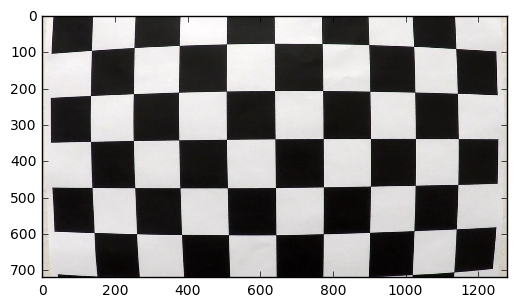

In [2]:
#reading in an image
image = mpimg.imread('camera_cal/calibration1.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray) to show a image

In [3]:
import glob

images = glob.glob('camera_cal/calibration*.jpg')

objpoints = [] #3D points in real world space
imgpoints = [] #2D points in image place

objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

## Apply the distortion correction to the raw image

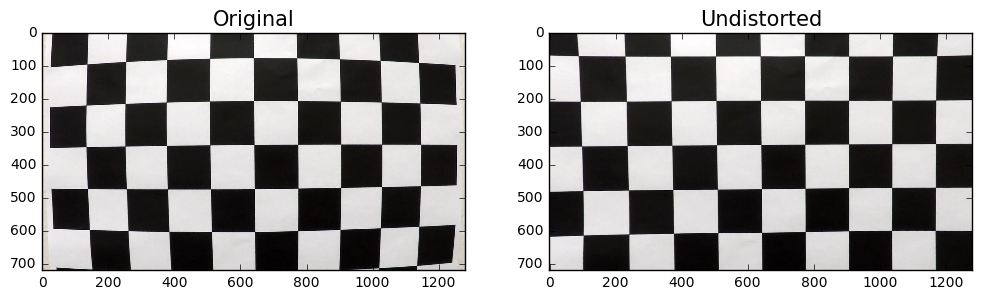

In [4]:
image = mpimg.imread('camera_cal/calibration1.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)

f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 10))
ax1.imshow(image)
ax1.set_title('Original', fontsize=15)
ax2.imshow(undst)
ax2.set_title('Undistorted', fontsize=15)


## Perspective transform undistorted images

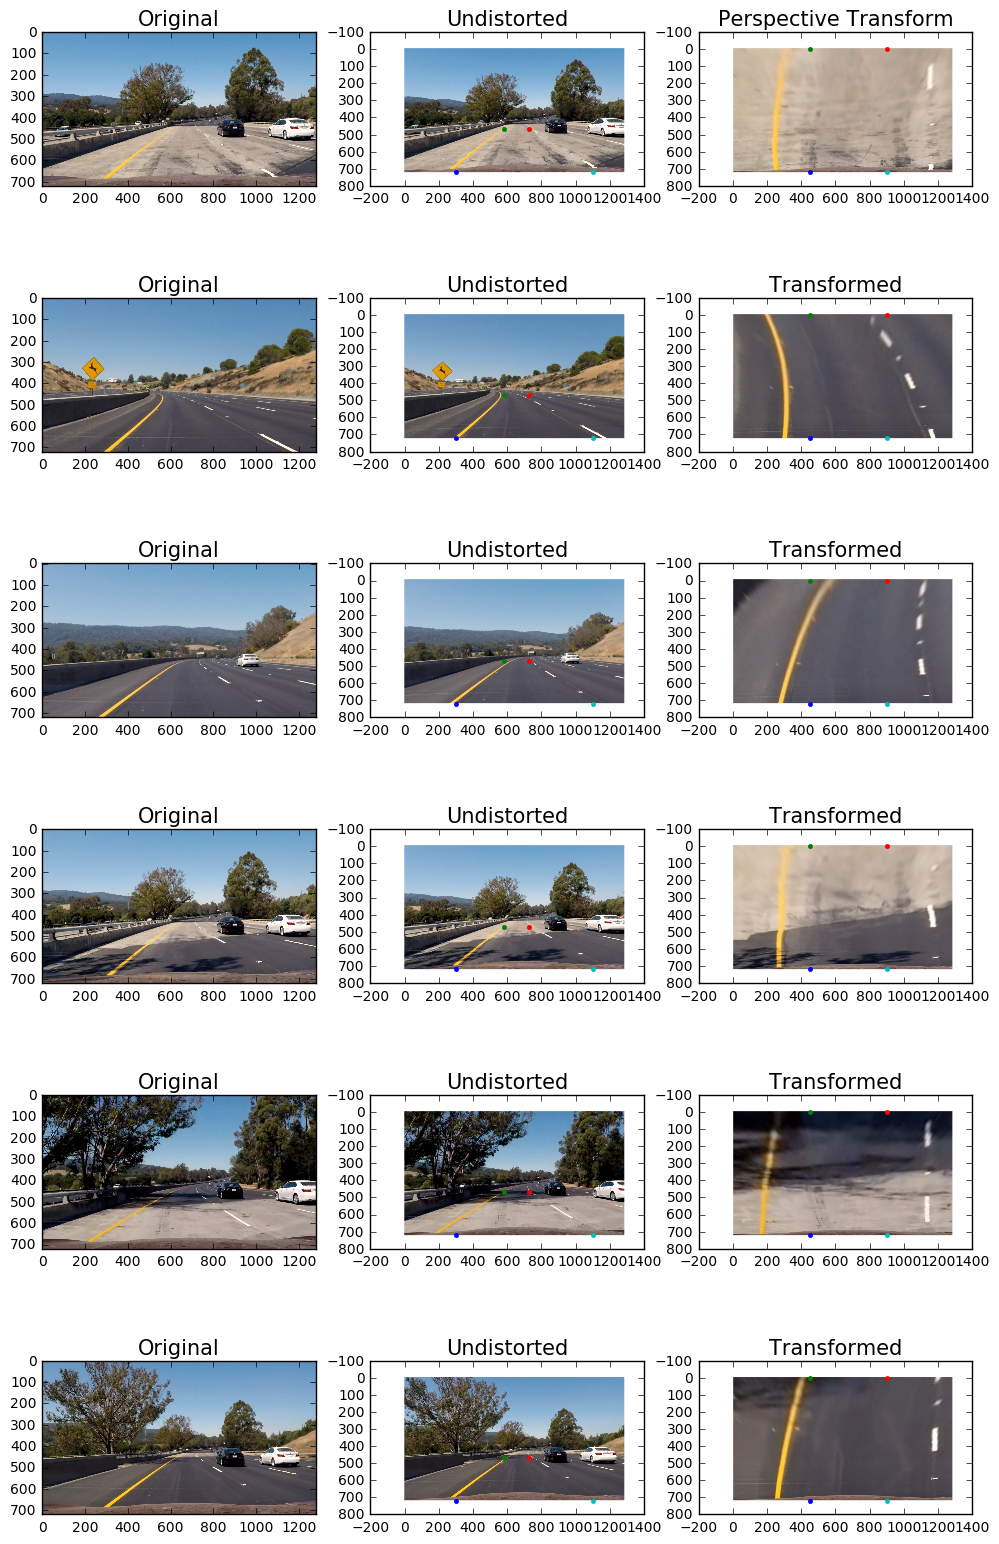

In [5]:
def perspective_transform(undist_image, src, dst, img_size):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undist_image, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

image1 = mpimg.imread('test_images/test1.jpg')
undst1 = cv2.undistort(image1, mtx, dist, None, mtx)

src = np.float32([(300, 720),(580, 470),(730, 470),(1100, 720)])
dst = np.float32([(300, 720),(300, 0),(1100, 0),(1100, 720)])

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(12, 20))

#trans_image = cv2.fillConvexPoly(undst, np.array([[270,700],[1130,700],[800,500],[500,520]]), (0,255,0) )

ax1.imshow(image1)
ax1.set_title('Original', fontsize=15)

ax2.imshow(undst1)
ax2.plot(300, 720, ".")
ax2.plot(580, 470, ".")
ax2.plot(730, 470, ".")
ax2.plot(1100, 720, ".")
ax2.set_title('Undistorted', fontsize=15)

transformed1 = perspective_transform(undst1, src, dst, (image1.shape[1], image1.shape[0]))
ax3.imshow(transformed1)
ax3.plot(450, 720, ".")
ax3.plot(450, 0, ".")
ax3.plot(900, 0, ".")
ax3.plot(900, 720, ".")
ax3.set_title('Perspective Transform', fontsize=15)

image2 = mpimg.imread('test_images/test2.jpg')
ax4.imshow(image2)
ax4.set_title('Original', fontsize=15)

undst2 = cv2.undistort(image2, mtx, dist, None, mtx)
ax5.imshow(undst2)
ax5.plot(300, 720, ".")
ax5.plot(580, 470, ".")
ax5.plot(730, 470, ".")
ax5.plot(1100, 720, ".")
ax5.set_title('Undistorted', fontsize=15)

transformed2 = perspective_transform(undst2, src, dst, (image2.shape[1], image2.shape[0]))
ax6.imshow(transformed2)
ax6.plot(450, 720, ".")
ax6.plot(450, 0, ".")
ax6.plot(900, 0, ".")
ax6.plot(900, 720, ".")
ax6.set_title('Transformed', fontsize=15)

image3 = mpimg.imread('test_images/test3.jpg')
ax7.imshow(image3)
ax7.set_title('Original', fontsize=15)

undst3 = cv2.undistort(image3, mtx, dist, None, mtx)
ax8.imshow(undst3)
ax8.plot(300, 720, ".")
ax8.plot(580, 470, ".")
ax8.plot(730, 470, ".")
ax8.plot(1100, 720, ".")
ax8.set_title('Undistorted', fontsize=15)

transformed3 = perspective_transform(undst3, src, dst, (image3.shape[1], image3.shape[0]))
ax9.imshow(transformed3)
ax9.plot(450, 720, ".")
ax9.plot(450, 0, ".")
ax9.plot(900, 0, ".")
ax9.plot(900, 720, ".")
ax9.set_title('Transformed', fontsize=15)

image4 = mpimg.imread('test_images/test4.jpg')
ax10.imshow(image4)
ax10.set_title('Original', fontsize=15)

undst4 = cv2.undistort(image4, mtx, dist, None, mtx)
ax11.imshow(undst4)
ax11.plot(300, 720, ".")
ax11.plot(580, 470, ".")
ax11.plot(730, 470, ".")
ax11.plot(1100, 720, ".")
ax11.set_title('Undistorted', fontsize=15)

transformed4 = perspective_transform(undst4, src, dst, (image4.shape[1], image4.shape[0]))
ax12.imshow(transformed4)
ax12.plot(450, 720, ".")
ax12.plot(450, 0, ".")
ax12.plot(900, 0, ".")
ax12.plot(900, 720, ".")
ax12.set_title('Transformed', fontsize=15)

image5 = mpimg.imread('test_images/test5.jpg')
ax13.imshow(image5)
ax13.set_title('Original', fontsize=15)

undst5 = cv2.undistort(image5, mtx, dist, None, mtx)
ax14.imshow(undst5)
ax14.plot(300, 720, ".")
ax14.plot(580, 470, ".")
ax14.plot(730, 470, ".")
ax14.plot(1100, 720, ".")
ax14.set_title('Undistorted', fontsize=15)

transformed5 = perspective_transform(undst5, src, dst, (image5.shape[1], image5.shape[0]))
ax15.imshow(transformed5)
ax15.plot(450, 720, ".")
ax15.plot(450, 0, ".")
ax15.plot(900, 0, ".")
ax15.plot(900, 720, ".")
ax15.set_title('Transformed', fontsize=15)

image6 = mpimg.imread('test_images/test6.jpg')
ax16.imshow(image6)
ax16.set_title('Original', fontsize=15)

undst6 = cv2.undistort(image6, mtx, dist, None, mtx)
ax17.imshow(undst6)
ax17.plot(300, 720, ".")
ax17.plot(580, 470, ".")
ax17.plot(730, 470, ".")
ax17.plot(1100, 720, ".")
ax17.set_title('Undistorted', fontsize=15)

transformed6 = perspective_transform(undst6, src, dst, (image6.shape[1], image6.shape[0]))
ax18.imshow(transformed6)
ax18.plot(450, 720, ".")
ax18.plot(450, 0, ".")
ax18.plot(900, 0, ".")
ax18.plot(900, 720, ".")
ax18.set_title('Transformed', fontsize=15)

## Use color transforms, gradients, etc., to create a thresholded binary image and then do a perspective transform

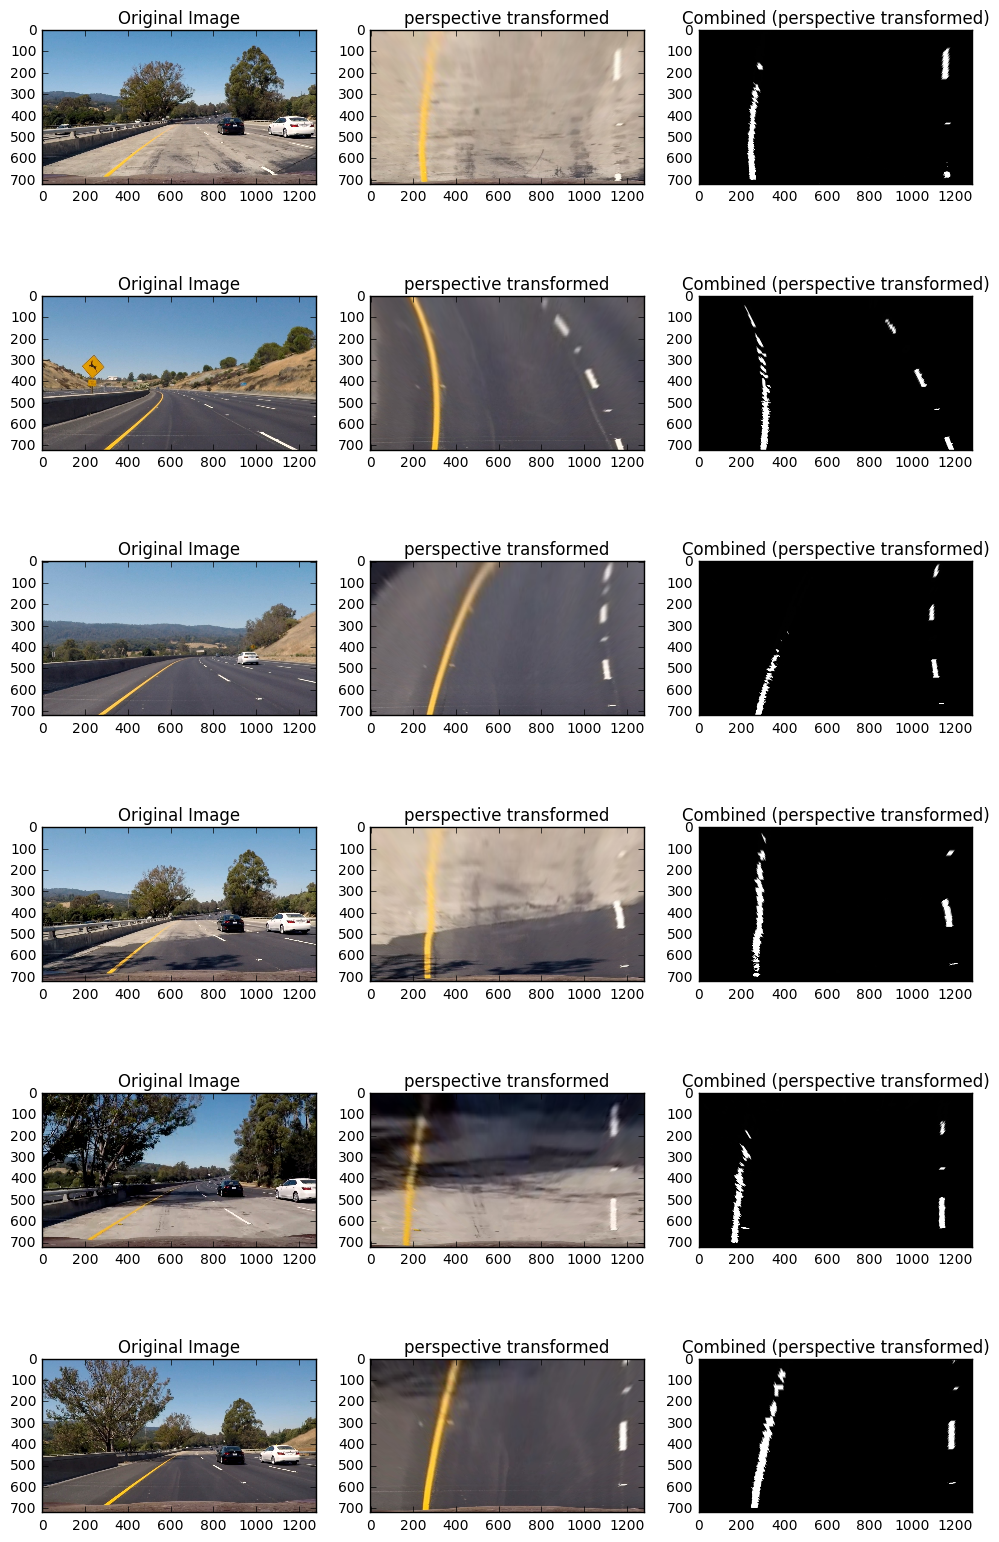

In [16]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

def color_transform_n_threshold(img, s_thresh=(190, 255), sx_thresh=(30, 255)):
    img = np.copy(img)
    
    white_rgb = cv2.inRange(img, (200,200,200), (255,255,255))
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    yellow_hsv = cv2.inRange(hsv, (10, 100, 100), (50, 255, 255))
    white_hsv = cv2.inRange(hsv, (200,200,200), (255,255,255))

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    s_ch = hls[:,:,2]
        
    #retval, s_ch_binary = cv2.threshold(s_ch.astype('uint8'), s_thresh[0], s_thresh[1], cv2.THRESH_BINARY)
    s_ch_binary = np.zeros_like(s_ch)
    s_ch_binary[(s_ch > 150) & (s_ch <= 200)] = 1

    white_hls = cv2.inRange(hls, (200,200,200), (255,255,255))

    # Sobel x
    sobelx = abs_sobel_thresh(img, 'x', sx_thresh[0], sx_thresh[1])
    
    # Sobel y
    sobely = abs_sobel_thresh(img, 'y', 100, 200)

    #bit_layer = s_ch_binary | sobelx | sobely | yellow_rgb | yellow_hsv | yellow_hls | white_rgb | white_hsv | white_hls   
    bit_layer = s_ch_binary | sobelx | sobely | yellow_hsv | white_rgb | white_hsv | white_hls 
    return s_ch_binary, bit_layer    

_, combined_b1 = color_transform_n_threshold(image1)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed1 = perspective_transform(combined_b1, src, dst, (combined_b1.shape[1], combined_b1.shape[0]))

_, combined_b2 = color_transform_n_threshold(image2)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed2 = perspective_transform(combined_b2, src, dst, (combined_b2.shape[1], combined_b2.shape[0]))

_, combined_b3 = color_transform_n_threshold(image3)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed3 = perspective_transform(combined_b3, src, dst, (combined_b3.shape[1], combined_b3.shape[0]))

_, combined_b4 = color_transform_n_threshold(image4)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed4 = perspective_transform(combined_b4, src, dst, (combined_b4.shape[1], combined_b4.shape[0]))

_, combined_b5 = color_transform_n_threshold(image5)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed5 = perspective_transform(combined_b5, src, dst, (combined_b5.shape[1], combined_b5.shape[0]))

_, combined_b6 = color_transform_n_threshold(image6)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed6 = perspective_transform(combined_b6, src, dst, (combined_b6.shape[1], combined_b6.shape[0]))

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(12, 20))

ax1.set_title('Original Image')
ax1.imshow(image1)
ax2.set_title('perspective transformed')
ax2.imshow(transformed1)
ax3.set_title('Combined (perspective transformed)')
ax3.imshow(combined_b_transformed1, cmap='gray')

ax4.set_title('Original Image')
ax4.imshow(image2)
ax5.set_title('perspective transformed')
ax5.imshow(transformed2)
ax6.set_title('Combined (perspective transformed)')
ax6.imshow(combined_b_transformed2, cmap='gray')

ax7.set_title('Original Image')
ax7.imshow(image3)
ax8.set_title('perspective transformed')
ax8.imshow(transformed3)
ax9.set_title('Combined (perspective transformed)')
ax9.imshow(combined_b_transformed3, cmap='gray')

ax10.set_title('Original Image')
ax10.imshow(image4)
ax11.set_title('perspective transformed')
ax11.imshow(transformed4)
ax12.set_title('Combined (perspective transformed)')
ax12.imshow(combined_b_transformed4, cmap='gray')

ax13.set_title('Original Image')
ax13.imshow(image5)
ax14.set_title('perspective transformed')
ax14.imshow(transformed5)
ax15.set_title('Combined (perspective transformed)')
ax15.imshow(combined_b_transformed5, cmap='gray')

ax16.set_title('Original Image')
ax16.imshow(image6)
ax17.set_title('perspective transformed')
ax17.imshow(transformed6)
ax18.set_title('Combined (perspective transformed)')
ax18.imshow(combined_b_transformed6, cmap='gray')


## Detect lane pixels and fit to find lane boundary.

In [32]:
import scipy.signal

def transpose_line(combined_b_trans_img):
    xcord_left_line = []
    ycord_left_line = []
    xcord_right_line = []
    ycord_right_line = []

    size = combined_b_trans_img.shape[0]//100
    left_peak = 250
    right_peak = 1200
    
    previous_left_peak = 250
    previous_right_peak = 1200
    left_peak_found = 0
    found_left_peak_value = 250
    right_peak_found = 0
    found_right_peak_value = 1200
    for i in reversed(range(0, 100)):
        start = i * combined_b_trans_img.shape[0]//100
        end = (i + 1) * combined_b_trans_img.shape[0]//100
        histogram = np.sum(combined_b_trans_img[start:end,:], axis=0)
        peaks = np.array(scipy.signal.find_peaks_cwt(histogram, np.array([200])))

        if len(peaks) == 0:
            left_peak = previous_left_peak
            right_peak = previous_right_peak
        elif len(peaks) == 1:
            left_peak = peaks[0]
            previous_left_peak = left_peak
            right_peak = previous_right_peak
            if left_peak_found == 0:
                left_peak_found = 1
                found_left_peak_value = left_peak
        else:
            left_peak = peaks[0]
            right_peak = peaks[1]
            previous_left_peak = left_peak
            previous_right_peak = right_peak
            if left_peak_found == 0:
                left_peak_found = 1
                found_left_peak_value = left_peak
            if right_peak_found == 0:
                right_peak_found = 1
                found_right_peak_value = right_peak

        if left_peak < 150: 
            left_peak = 250
        if left_peak > 700:
            left_peak = 250
        
        if right_peak < 500:
            right_peak = 1200
        if right_peak > 1250:
            right_peak = 1200
            
        xcord_left_line.append(left_peak)
        ycord_left_line.append(int(i * combined_b_trans_img.shape[0] // 100))
        xcord_right_line.append(right_peak)
        ycord_right_line.append(int(i * combined_b_trans_img.shape[0] // 100))

    ycord_left_line = np.array(ycord_left_line)
    xcord_left_line = np.array(xcord_left_line)
    
    ycord_right_line = np.array(ycord_right_line)
    xcord_right_line = np.array(xcord_right_line)

    # Fit a second order polynomial to each lane line
    left_fit = np.polyfit(ycord_left_line, xcord_left_line, 2)
    left_fitx = left_fit[0] * ycord_left_line ** 2 + left_fit[1] * ycord_left_line + left_fit[2]

    right_fit = np.polyfit(ycord_right_line, xcord_right_line, 2)
    right_fitx = right_fit[0] * ycord_right_line ** 2 + right_fit[1] * ycord_right_line + right_fit[2]

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meteres per pixel in x dimension
    y_eval_left = np.max(ycord_left_line)
    y_eval_right = np.max(ycord_right_line)
    
    left_fit_cr = np.polyfit(ycord_left_line*ym_per_pix, xcord_left_line*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ycord_right_line*ym_per_pix, xcord_right_line*xm_per_pix, 2)
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval_left + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval_right + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])
    
    return left_fitx, ycord_left_line, right_fitx, ycord_right_line, left_curverad, right_curverad

print("=====test_image1======")    
left_fitx1, ycord_left_line1, right_fitx1, ycord_right_line1, left_curverad1, right_curverad1 = transpose_line(combined_b_transformed1)
print("=====test_image2======")    
left_fitx2, ycord_left_line2, right_fitx2, ycord_right_line2, left_curverad2, right_curverad2 = transpose_line(combined_b_transformed2)
print("=====test_image3======")     
left_fitx3, ycord_left_line3, right_fitx3, ycord_right_line3, left_curverad3, right_curverad3 = transpose_line(combined_b_transformed3)
print("=====test_image4======")    
left_fitx4, ycord_left_line4, right_fitx4, ycord_right_line4, left_curverad4, right_curverad4 = transpose_line(combined_b_transformed4)
print("=====test_image5======")    
left_fitx5, ycord_left_line5, right_fitx5, ycord_right_line5, left_curverad5, right_curverad5 = transpose_line(combined_b_transformed5)
print("=====test_image6======")    
left_fitx6, ycord_left_line6, right_fitx6, ycord_right_line6, left_curverad6, right_curverad6 = transpose_line(combined_b_transformed6)

=====test_image1======
=====test_image2======
=====test_image3======
=====test_image4======
=====test_image5======
=====test_image6======


## Warp the detected lane boundaries back onto the original image.

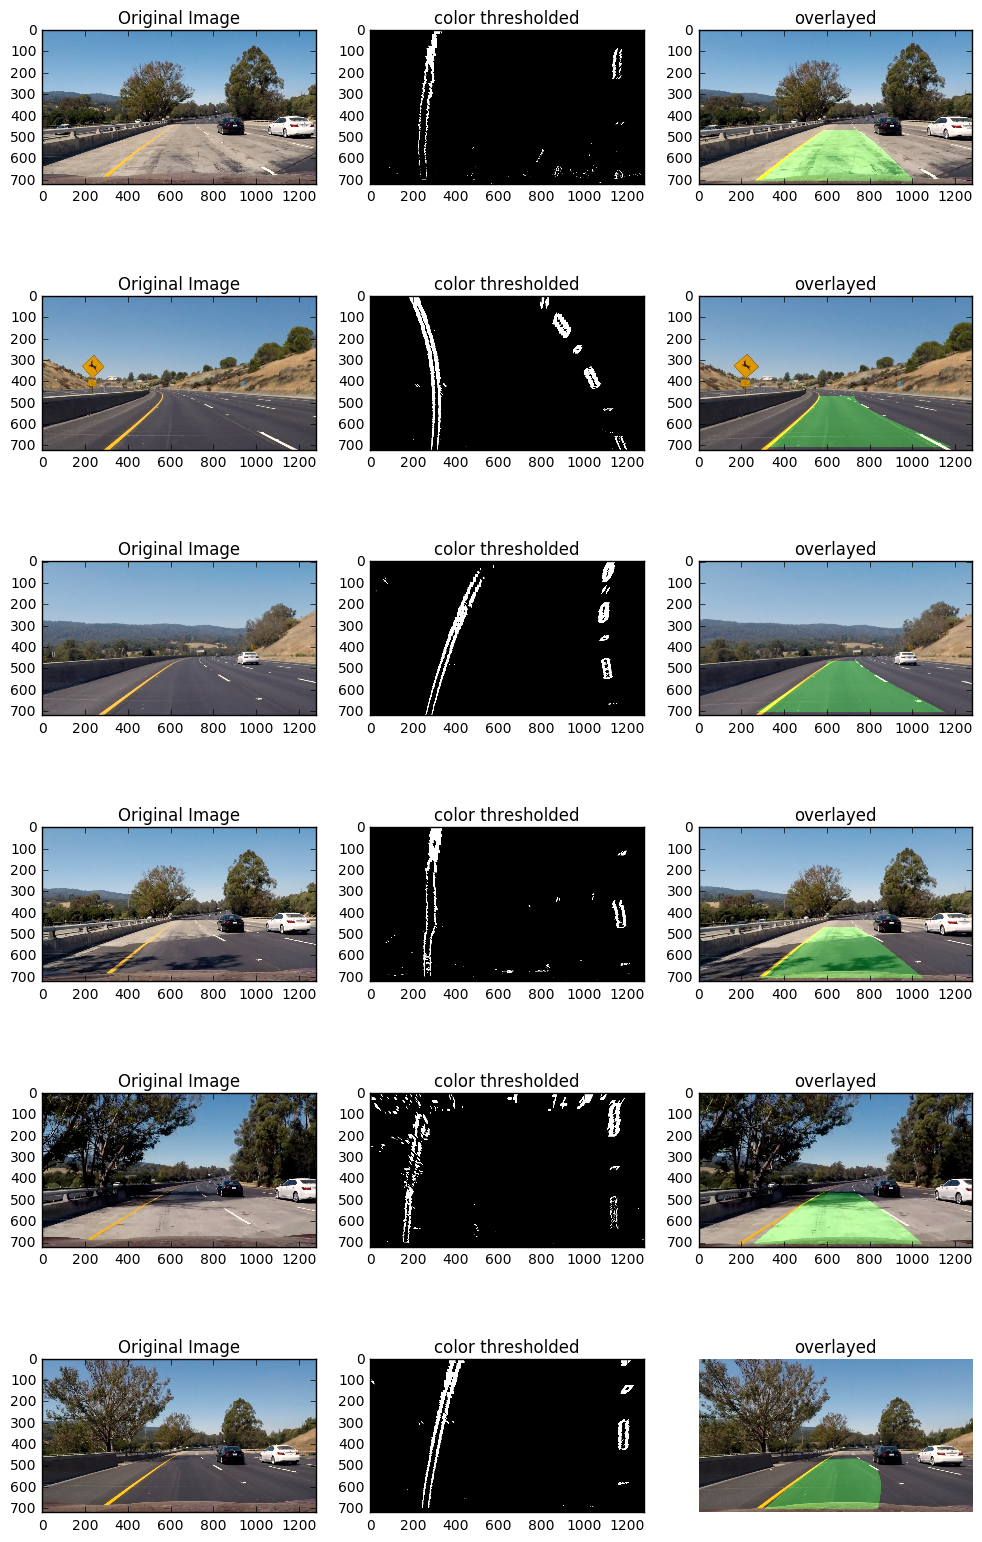

In [33]:
def drawlines(transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(transformed).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ycord_left_line]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ycord_right_line])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = perspective_transform(color_warp, dst, src , (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undst, 1, newwarp, 0.3, 0)
    return result

r1 = drawlines(combined_b_transformed1, left_fitx1, ycord_left_line1, right_fitx1, ycord_right_line1, src, dst, image1, undst1)
r2 = drawlines(combined_b_transformed2, left_fitx2, ycord_left_line2, right_fitx2, ycord_right_line2, src, dst, image2, undst2)
r3 = drawlines(combined_b_transformed3, left_fitx3, ycord_left_line3, right_fitx3, ycord_right_line3, src, dst, image3, undst3)
r4 = drawlines(combined_b_transformed4, left_fitx4, ycord_left_line4, right_fitx4, ycord_right_line4, src, dst, image4, undst4)
r5 = drawlines(combined_b_transformed5, left_fitx5, ycord_left_line5, right_fitx5, ycord_right_line5, src, dst, image5, undst5)
r6 = drawlines(combined_b_transformed6, left_fitx6, ycord_left_line6, right_fitx6, ycord_right_line6, src, dst, image6, undst6)


f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(12, 20))
plt.axis('off')

ax1.set_title('Original Image')
ax1.imshow(image1)
ax2.set_title('color thresholded')
ax2.imshow(combined_b_transformed1, cmap='gray')
ax3.set_title('overlayed')
ax3.imshow(r1, cmap='gray')

ax4.set_title('Original Image')
ax4.imshow(image2)
ax5.set_title('color thresholded')
ax5.imshow(combined_b_transformed2, cmap='gray')
ax6.set_title('overlayed')
ax6.imshow(r2, cmap='gray')

ax7.set_title('Original Image')
ax7.imshow(image3)
ax8.set_title('color thresholded')
ax8.imshow(combined_b_transformed3, cmap='gray')
ax9.set_title('overlayed')
ax9.imshow(r3, cmap='gray')

ax10.set_title('Original Image')
ax10.imshow(image4)
ax11.set_title('color thresholded')
ax11.imshow(combined_b_transformed4, cmap='gray')
ax12.set_title('overlayed')
ax12.imshow(r4, cmap='gray')

ax13.set_title('Original Image')
ax13.imshow(image5)
ax14.set_title('color thresholded')
ax14.imshow(combined_b_transformed5, cmap='gray')
ax15.set_title('overlayed')
ax15.imshow(r5, cmap='gray')

ax16.set_title('Original Image')
ax16.imshow(image6)
ax17.set_title('color thresholded')
ax17.imshow(combined_b_transformed6, cmap='gray')
ax18.set_title('overlayed')
ax18.imshow(r6, cmap='gray')

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [21]:
from moviepy.editor import VideoFileClip

def pipeline(image):
    undst = cv2.undistort(image, mtx, dist, None, mtx)

    s_b, combined_b = color_transform_n_threshold(image)
    #s_b_transformed = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
    combined_b_transformed = perspective_transform(combined_b, src, dst, (combined_b.shape[1], combined_b.shape[0]))
    
    left_fitx, ycord_left_line, right_fitx, ycord_right_line, left_curverad, right_curverad = transpose_line(combined_b_transformed)
    r = drawlines(combined_b_transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst)
    return r

clip1 = VideoFileClip("project_video.mp4")
project_clip = clip1.fl_image(pipeline)

%time project_clip.write_videofile('project_video_updated.mp4', audio=False)



[MoviePy] >>>> Building video project_video_updated.mp4
[MoviePy] Writing video project_video_updated.mp4


100%|█████████▉| 1260/1261 [39:02<00:01,  1.88s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_updated.mp4 

CPU times: user 58min 20s, sys: 1min 26s, total: 59min 46s
Wall time: 39min 3s
